In [2]:
# Import Flask
from flask import Flask

# Import ORM dependencies
import sqlalchemy
from pathlib import Path 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, text, inspect, func
from sqlalchemy.orm import Session 
import datetime as dt
from datetime import datetime, timedelta

# Plotting dependencies
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Create engine using the hawaii db file
engine = create_engine(f'sqlite:///../Resources/hawaii.sqlite', echo=False)
engine

Engine(sqlite:///../Resources/hawaii.sqlite)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Reflect Database into ORM Class 
Base = automap_base()
Base.prepare(autoload_with=engine)

Measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [6]:
# Create a session

session = Session(engine)

----------------------------------------------------------------

# Precipitation Analysis

### Data Exploration

In [7]:
# Display the column names and data types in the measurement table 

Measurement =  inspector.get_columns('measurement')
for column in Measurement:
    print(column['name'], column['type'])

# Measurement = Base.classes.measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
query = 'SELECT * FROM measurement LIMIT 10'
engine.connect().execute(text(query)).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

### Analysis

In [9]:
# Find the most recent date in the dataset
most_recent_date = session.query(Measurement_table.date).order_by\
                (Measurement_table.date.desc()).first()

most_recent_date = most_recent_date[0]

type(most_recent_date)

str

In [33]:
# Query the database for precipitation data for the previous 12 months
precipitation_data = session.query(Measurement_table.date, Measurement_table.prcp).\
    filter(Measurement_table.date >= func.date(most_recent_date, "-12 months")).\
    filter(Measurement_table.date <= most_recent_date).\
    order_by(Measurement_table.date).all()

# Print the precipitation data
for data in precipitation_data:
    print(data.date, data.prcp)

2016-08-23 0.0
2016-08-23 0.15
2016-08-23 0.05
2016-08-23 None
2016-08-23 0.02
2016-08-23 1.79
2016-08-23 0.7
2016-08-24 0.08
2016-08-24 2.15
2016-08-24 2.28
2016-08-24 None
2016-08-24 1.22
2016-08-24 2.15
2016-08-24 1.45
2016-08-25 0.08
2016-08-25 0.08
2016-08-25 0.0
2016-08-25 0.0
2016-08-25 0.21
2016-08-25 0.06
2016-08-25 0.11
2016-08-26 0.0
2016-08-26 0.03
2016-08-26 0.02
2016-08-26 0.04
2016-08-26 0.0
2016-08-26 0.01
2016-08-27 0.0
2016-08-27 0.18
2016-08-27 0.02
2016-08-27 0.0
2016-08-27 0.12
2016-08-27 None
2016-08-28 0.01
2016-08-28 0.14
2016-08-28 0.14
2016-08-28 0.14
2016-08-28 0.6
2016-08-28 2.07
2016-08-29 0.0
2016-08-29 0.17
2016-08-29 0.04
2016-08-29 None
2016-08-29 0.0
2016-08-29 0.35
2016-08-29 0.9
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 0.02
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 0.05
2016-08-31 0.13
2016-08-31 0.1
2016-08-31 None
2016-08-31 None
2016-08-31 0.25
2016-08-31 0.24
2016-08-31 2.46
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 None
2016-09-01 0

In [16]:
# Load the query results into a Pandas DataFrame. Explicitly set the column names.

preciptn_12_months = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
preciptn_12_months


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [17]:
# Sort df by date
preciptn_12_months_df = preciptn_12_months.sort_values('Date')
preciptn_12_months_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


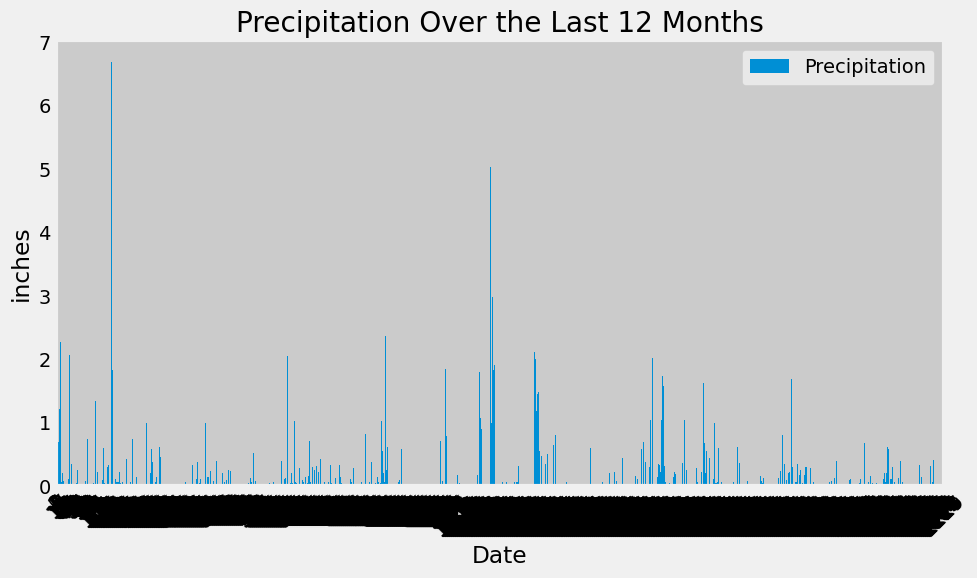

In [18]:
# Plot the data

preciptn_12_months_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('inches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to print the summary statistics for the precipitation data.
print(preciptn_12_months_df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


--------------------------------------------------------------------

# STATION ANALYSIS

### Explore the data

In [20]:
# Display the column names and data types in the station table 

Station = inspector.get_columns('station')
for column in Station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Fetch all rows from the station_table
stations = session.query(station_table).all()

# Print each row
for station in stations:
    print(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)

1 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
2 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
4 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
5 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
7 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
9 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4


### Analysis

In [22]:
# Query to calculate the total number of stations
total_stations = session.query(func.count(func.distinct(station_table.id))).scalar()
print(total_stations)

9


In [23]:
# Most active station

most_active_stations = session.query(Measurement_table.station, func.count(Measurement_table.station)).\
                        group_by(Measurement_table.station).\
                        order_by(func.count(Measurement_table.station).desc()).all()

for station in most_active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# Retrieve the station ID with the greatest number of observations
most_active_station = most_active_stations[0][0]

print(f'Station ID with the greatest number of observations is: {most_active_station}' )

Station ID with the greatest number of observations is: USC00519281


In [25]:
# Calculate the date 12 months prior to the most recent date
most_recent_date = session.query(func.max(Measurement_table.date)).scalar()
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)


# Query TOBS data for the most active station for the previous 12 months
tobs_data = session.query(Measurement_table.tobs).\
                filter(Measurement_table.station == most_active_station).\
                filter(Measurement_table.date >= one_year_ago).\
                filter(Measurement_table.date <= most_recent_date).all()

In [29]:
tobs_data

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [ ]:
temperature_data = session.query(func.min(Measurement_table.tobs),
                                     func.avg(Measurement_table.tobs),
                                     func.max(Measurement_table.tobs)).\
        filter(Measurement_table.date >= start).all()

In [26]:
# Convert the result to a DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['TOBS'])

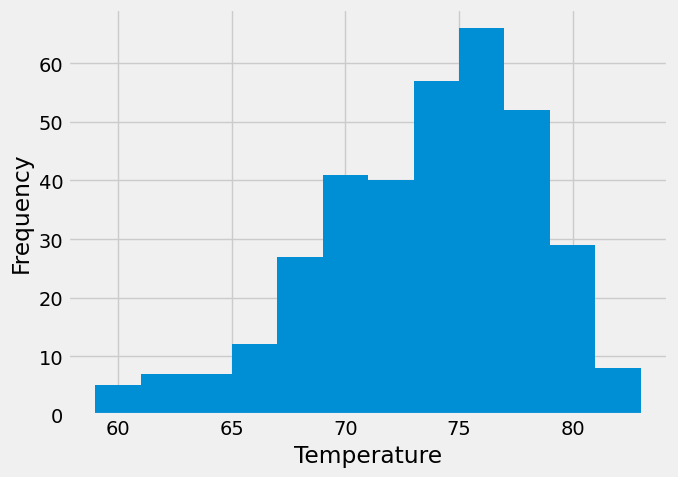

In [27]:
# Plot the histogram
plt.figure(figsize=(7, 5))
plt.hist(tobs_df['TOBS'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Close the session
session.close()